# Theoretical  

Q1. What is K-Nearest Neighbors (KNN) and how does it work?

  
  KNN is a non-parametric, instance-based learning algorithm used for classification and regression. It works by finding the K closest data points in the training set to a new input and predicting the label based on the majority vote (classification) or average (regression) of these neighbors.

Q2. What is the difference between KNN Classification and KNN Regression?

KNN Classification predicts a categorical class label by taking a majority vote of the k nearest neighbors' classes. KNN Regression predicts a continuous numerical value by averaging (or taking a weighted average) the target values of the k nearest neighbors.

Q3. What is the role of the distance metric in KNN?

  The distance metric (e.g., Euclidean, Manhattan) defines how the "nearness" between data points is measured. It significantly influences which neighbors are considered the closest and therefore directly impacts the prediction outcome in both KNN classification and regression.

Q4. What is the Curse of Dimensionality in KNN?

  In high-dimensional data, the distance between points becomes less meaningful as they tend to be sparse and equidistant. This can lead to irrelevant features influencing the neighbor selection, reducing the effectiveness of KNN and increasing computational cost.

Q5. How can we choose the best value of K in KNN?

  The optimal k is typically found through experimentation and validation techniques like cross-validation. A small k can be sensitive to noise, while a large k can smooth out decision boundaries and potentially include dissimilar points. We look for a k that generalizes well to unseen data.

Q6. What are KD Tree and Ball Tree in KNN?

  KD Tree and Ball Tree are data structures used to efficiently find the nearest neighbors of a query point in KNN. They partition the data space in hierarchical ways, allowing the algorithm to avoid calculating distances to all training points.

Q7. When should you use KD Tree vs. Ball Tree?

  KD Tree is generally efficient for lower-dimensional data (typically less than 20 dimensions) and when the distance metric is Euclidean or Manhattan. Ball Tree tends to perform better in higher-dimensional spaces and for more general distance metrics.

Q8. What are the disadvantages of KNN?

  Disadvantages include being computationally expensive for large datasets (especially during prediction), sensitivity to the choice of k and distance metric, poor performance in high-dimensional spaces (Curse of Dimensionality), and the need for feature scaling.

Q9. How does feature scaling affect KNN?

  KNN relies on distance calculations. Features with larger scales can disproportionately influence the distance, leading to biased neighbor selection. Feature scaling (e.g., standardization or normalization) ensures all features contribute equally to the distance metric.

Q10. What is PCA (Principal Component Analysis)?

  PCA is a dimensionality reduction technique that transforms data into a new set of orthogonal variables called principal components. These components capture the maximum variance in the data, with the first component having the most variance, the second having the next most, and so on.

Q11. How does PCA work?

  PCA works by:
  
  1) Standardizing the data.
  
  2) Calculating the covariance matrix.
  
  3) Finding the eigenvectors and eigenvalues of the covariance matrix.
  
  4) Sorting the eigenvectors based on their eigenvalues (which represent the variance explained).
  
  5) Selecting the top k eigenvectors to form a projection matrix.
  
  6) Projecting the original data onto this lower-dimensional subspace.

Q12. What is the geometric intuition behind PCA?

  Geometrically, PCA identifies the principal axes (eigenvectors) of the data's spread (variance). The first principal component points in the direction of the largest variance, the second in the direction of the second largest variance (orthogonal to the first), and so on. Projecting data onto these axes reduces dimensionality while retaining the most important information (variance).

Q13. What is the difference between Feature Selection and Feature Extraction?

  Feature Selection involves choosing a subset of the original features that are most relevant for the task, without transforming them. Feature Extraction creates new, lower-dimensional features from the original ones through transformations (like PCA), aiming to capture the essential information.

Q14. What are Eigenvalues and Eigenvectors in PCA?

  Eigenvectors are the principal directions (axes of maximum variance) in the data. Eigenvalues represent the amount of variance explained along their corresponding eigenvectors. Larger eigenvalues indicate more important principal components.

Q15. How do you decide the number of components to keep in PCA?

  Common methods include: 1) Examining the explained variance ratio (keeping components that explain a significant portion, e.g., 95%). 2) Using a scree plot to look for an "elbow" where the explained variance drops significantly. 3) Cross-validation based on the performance of a downstream task.

Q16. Can PCA be used for classification?

  Yes, PCA is primarily a dimensionality reduction technique but can be used as a preprocessing step for classification. By reducing the number of features, it can help to mitigate the Curse of Dimensionality, reduce noise, and potentially improve the performance and efficiency of classification algorithms.

Q17. What are the limitations of PCA?

  Limitations include: it assumes linear relationships between features, it's sensitive to data scaling, it may not preserve class separability in classification tasks (as it focuses on variance, not class distinctions), and the principal components can be difficult to interpret in terms of the original features.

Q18. How do KNN and PCA complement each other?

  PCA can be used as a preprocessing step for KNN to reduce the dimensionality of the data. This can help to mitigate the Curse of Dimensionality, reduce computational cost during neighbor search, and potentially improve KNN's performance by focusing on the most important variance in the data.

Q19. How does KNN handle missing values in a dataset?

Standard KNN implementations struggle with missing values as distance calculations become problematic. Common approaches to handle missing values before applying KNN include:

1) Imputation (replacing missing values with the mean, median, or mode).

2) Removing data points with missing values (if the amount is small). Some more advanced KNN variations can handle missing values directly during distance calculation.

Q20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

  PCA is an unsupervised dimensionality reduction technique that aims to maximize variance in the projected data. LDA is a supervised technique that aims to find a lower-dimensional subspace that maximizes the separation between different classes. PCA doesn't consider class labels, while LDA explicitly uses them.

# Practical  

Q21. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Q22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 236.56721204293464


Q23.Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"{metric} Accuracy:", accuracy_score(y_test, y_pred))

euclidean Accuracy: 1.0
manhattan Accuracy: 1.0


Q24. Train a KNN Classifier with different values of K and visualize decision boundaried

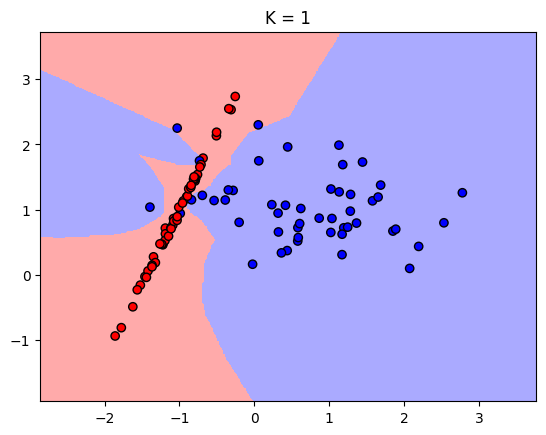

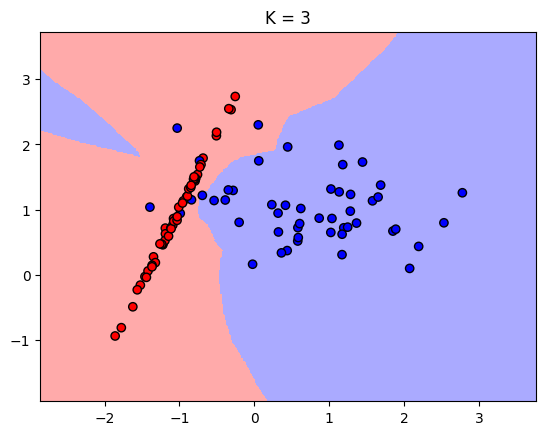

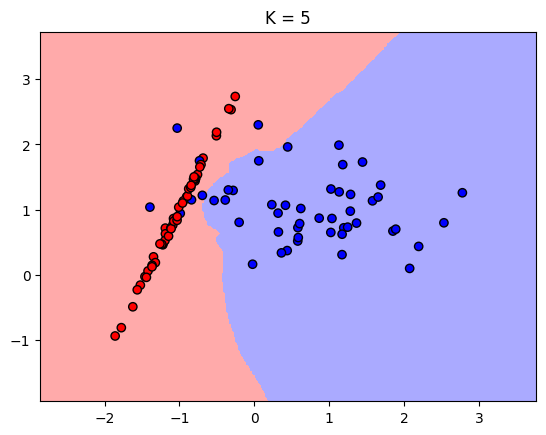

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

h = .02  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['red', 'blue']

for n in [1, 3, 5]:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k')
    plt.title(f"K = {n}")
    plt.show()

Q25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

Scaled Accuracy: 0.9555555555555556


Q26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [7]:
from sklearn.decomposition import PCA

X, _ = make_classification(n_samples=200, n_features=5, random_state=42)
pca = PCA()
pca.fit(X)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [4.81376676e-01 3.37198116e-01 1.81425208e-01 4.08658462e-17
 0.00000000e+00]


Q27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [8]:
X, y = make_classification(n_samples=200, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Without PCA Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# With PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
knn.fit(X_train, y_train)
print("With PCA Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

Without PCA Accuracy: 0.78
With PCA Accuracy: 0.76


Q28.  Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [9]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'n_neighbors': 10, 'weights': 'uniform'}
Best Accuracy: 0.8533333333333333


Q29. Train a KNN Classifier and check the number of misclassified samples.

In [10]:
y_pred = knn.predict(X_test)
print("Misclassified Samples:", np.sum(y_pred != y_test))

Misclassified Samples: 12


Q30. Train a PCA model and visualize the cumulative explained variance.

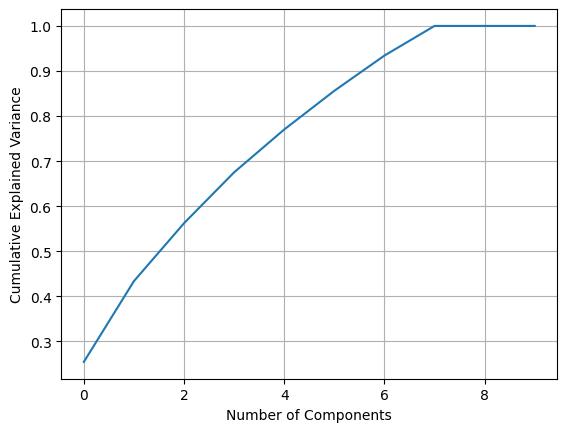

In [11]:
pca = PCA().fit(X)
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Q31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [12]:
for weight in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn.fit(X_train, y_train)
    print(f"{weight} Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

uniform Accuracy: 0.76
distance Accuracy: 0.76


Q32. Train a KNN Regressor and analyze the effect of different K values on performance.

In [13]:
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"K={k} MSE:", mean_squared_error(y_test, knn.predict(X_test)))

K=1 MSE: 0.24
K=2 MSE: 0.2
K=3 MSE: 0.15333333333333335
K=4 MSE: 0.16125
K=5 MSE: 0.1592
K=6 MSE: 0.15388888888888888
K=7 MSE: 0.1628571428571429
K=8 MSE: 0.1540625
K=9 MSE: 0.15037037037037038
K=10 MSE: 0.1406


Q33. Implement KNN Imputation for handling missing values in a dataset.

In [15]:
from sklearn.impute import KNNImputer
import numpy as np

X_with_nan = X.copy()
X_with_nan[::5] = np.nan  # artificially introduce missing values
imputer = KNNImputer(n_neighbors=3)
X_filled = imputer.fit_transform(X_with_nan)

Q34. Train a PCA model and visualize the data projection onto the first two principal components.

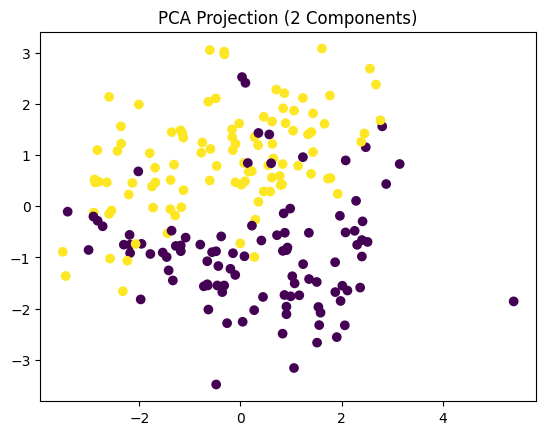

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Projection (2 Components)")
plt.show()

Q35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [17]:
for algo in ['kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(algorithm=algo)
    knn.fit(X_train, y_train)
    print(f"{algo} Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

kd_tree Accuracy: 0.76
ball_tree Accuracy: 0.76


Q36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

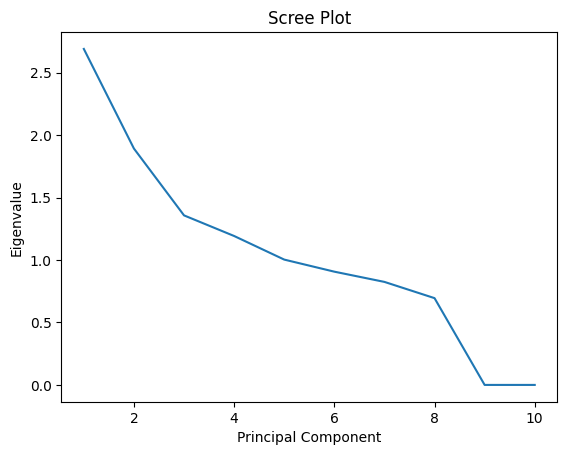

In [18]:
pca = PCA().fit(X)
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

Q37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.75      0.75      0.75        24

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



Q38. Train a PCA model and analyze the effect of different numbers of components on accuracy.

In [20]:
for n in range(1, X.shape[1] + 1):
    X_pca = PCA(n_components=n).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    print(f"{n} components → Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

1 components → Accuracy: 0.4
2 components → Accuracy: 0.88
3 components → Accuracy: 0.82
4 components → Accuracy: 0.84
5 components → Accuracy: 0.74
6 components → Accuracy: 0.74
7 components → Accuracy: 0.74
8 components → Accuracy: 0.78
9 components → Accuracy: 0.72
10 components → Accuracy: 0.84


Q39. Train a KNN Classifier with different leaf_size values and compare accuracy.

In [21]:
for leaf in [10, 20, 30, 50]:
    knn = KNeighborsClassifier(leaf_size=leaf).fit(X_train, y_train)
    print(f"Leaf size {leaf} → Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


Leaf size 10 → Accuracy: 0.84
Leaf size 20 → Accuracy: 0.84
Leaf size 30 → Accuracy: 0.84
Leaf size 50 → Accuracy: 0.84


Q40. Train a PCA model and visualize how data points are transformed before and after PCA.

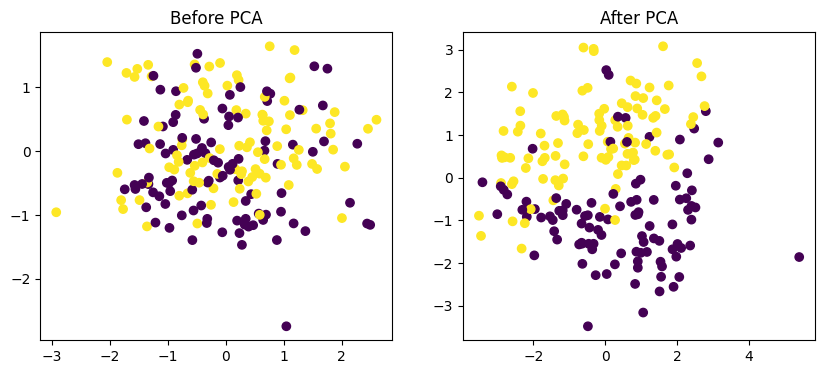

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(X[:, 0], X[:, 1], c=y)
axs[0].set_title("Before PCA")
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axs[1].set_title("After PCA")
plt.show()

Q41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

In [23]:
from sklearn.datasets import load_wine
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.65      0.69      0.67        16
           2       0.44      0.40      0.42        10

    accuracy                           0.71        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.71      0.71      0.71        45



Q42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

In [24]:
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(metric=metric)
    knn.fit(X_train, y_train)
    print(f"{metric} MSE:", mean_squared_error(y_test, knn.predict(X_test)))

euclidean MSE: 0.25422222222222224
manhattan MSE: 0.23022222222222222


Q43. Train a KNN Classifier and evaluate using ROC-AUC score.

In [27]:
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier().fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))

y_prob = knn.predict_proba(X_test)
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.65      0.69      0.67        16
           2       0.44      0.40      0.42        10

    accuracy                           0.71        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.71      0.71      0.71        45

ROC-AUC Score: 0.8770799595141701


Q44. Train a PCA model and visualize the variance captured by each principal component.

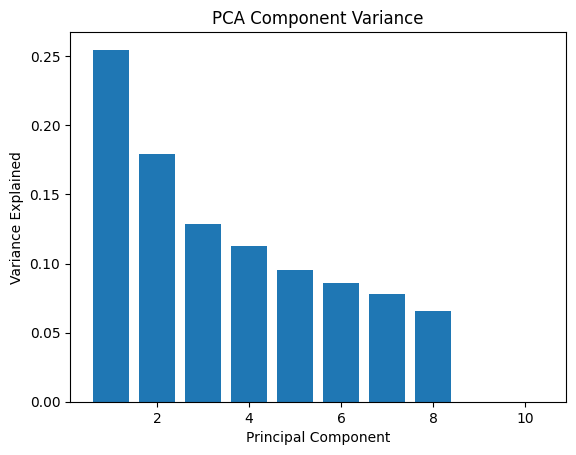

In [28]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Component Variance")
plt.show()

Q45. Train a KNN Classifier and perform feature selection before training.

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y)
knn.fit(X_train, y_train)
print("Accuracy after feature selection:", accuracy_score(y_test, knn.predict(X_test)))

Accuracy after feature selection: 0.8


Q46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.

In [30]:
X_pca = PCA(n_components=2).fit_transform(X)
X_inv = PCA(n_components=2).fit(X).inverse_transform(X_pca)
print("Reconstruction Error:", np.mean((X - X_inv) ** 2))

Reconstruction Error: 0.5949078116722799


Q47. Train a KNN Classifier and visualize the decision boundary.

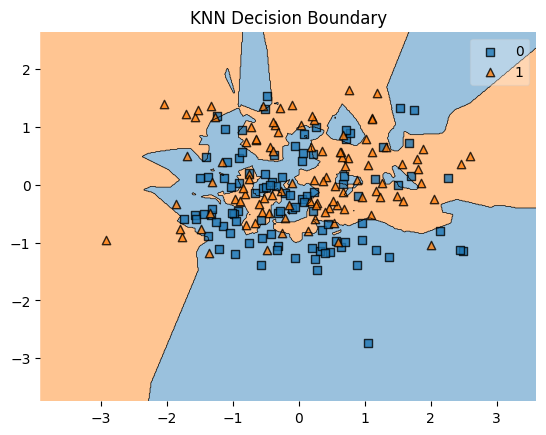

In [31]:
from mlxtend.plotting import plot_decision_regions

X_vis = X[:, :2]  # reduce to 2D for visualization
knn = KNeighborsClassifier(n_neighbors=3).fit(X_vis, y)
plot_decision_regions(X_vis, y, clf=knn)
plt.title("KNN Decision Boundary")
plt.show()

Q48. Train a PCA model and analyze the effect of different numbers of components on data variance.

In [32]:
total_var = np.sum(PCA().fit(X).explained_variance_)
for n in [1, 2, 3, 5, X.shape[1]]:
    pca = PCA(n_components=n).fit(X)
    retained = np.sum(pca.explained_variance_)
    print(f"{n} components → Retained Variance: {retained / total_var:.2f}")

1 components → Retained Variance: 0.25
2 components → Retained Variance: 0.43
3 components → Retained Variance: 0.56
5 components → Retained Variance: 0.77
10 components → Retained Variance: 1.00
